In [33]:
import numpy as np
import pandas as pd

from sklearn.covariance import GraphicalLassoCV
from sklearn.covariance import GraphicalLasso

from sklearn import covariance
from sklearn import cluster , manifold

from sklearn.preprocessing import StandardScaler

from matplotlib.collections import LineCollection
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from data.get_data import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
all_assets = pd.read_csv("all_asset.csv")
ALL_ASSETS = all_assets['asset'].to_list()

In [35]:
len(ALL_ASSETS)

529

In [51]:
from multiAnalysis.market import Market


OLD = ["BTC", "ETH", "DASH", "LTC", "XMR"]
BOOMS = ["CAKE", "FTM", "DEXE", "MATIC", "SOL", "SC", "BNB"]

ASSETS = ALL_ASSETS
START = "2017"
END = "2023"


data_r = get_data(interval="1d", assets = ASSETS, start=START, end=END)

X = data_r.isna().sum().sort_values()
Since_2020 = X[X < 730].index

data_r = data_r[Since_2020].dropna()

DROP = []
STABLE = ["USDC", "BUSD", "TUSD", "PAX", "USDS", "USDSB"]
OTHERS = ["TFUEL"]
SUPP = ["ERD", "NPXS", "BTT", "ERD", "NANO", "BCHABC"]
DROP.extend(STABLE)
DROP.extend(OTHERS)
DROP.extend(SUPP)

for asset in DROP:
    try:
        data_r.drop(columns = [asset],  inplace=True)
    except:
        continue

threshold = 0.1
mkrt = Market(data_r)
mkrt.execute(threshold)

c:\Users\cc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\covariance\_graph_lasso.py:272: RuntimeWarning:

invalid value encountered in multiply

c:\Users\cc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\covariance\_graph_lasso.py:273: RuntimeWarning:

invalid value encountered in multiply

c:\Users\cc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning:

invalid value encountered in subtract



In [52]:
data_r.columns

Index(['ETH', 'BTC', 'BNB', 'BCC', 'NEO', 'LTC', 'QTUM', 'ADA', 'XRP', 'EOS',
       'XLM', 'IOTA', 'ONT', 'TRX', 'ETC', 'ICX', 'VEN', 'NULS', 'VET',
       'BCHSV', 'LINK', 'WAVES', 'ONG', 'HOT', 'ZIL', 'FET', 'ZRX', 'BAT',
       'XMR', 'ZEC', 'IOST', 'CELR', 'DASH', 'OMG', 'THETA', 'ENJ', 'MITH',
       'MATIC', 'ATOM', 'ONE', 'FTM', 'ALGO', 'GTO', 'DOGE', 'DUSK', 'ANKR',
       'WIN', 'COS'],
      dtype='object')

In [50]:
Since_2020

Index(['ETH', 'BTC', 'BNB', 'BCC', 'NEO', 'LTC', 'QTUM', 'ADA', 'XRP', 'EOS',
       'XLM', 'IOTA', 'TUSD', 'ONT', 'TRX', 'ETC', 'ICX', 'VEN', 'NULS', 'VET',
       'PAX', 'BCHABC', 'BCHSV', 'USDC', 'LINK', 'WAVES', 'BTT', 'USDS', 'ONG',
       'HOT', 'ZIL', 'FET', 'ZRX', 'BAT', 'XMR', 'ZEC', 'IOST', 'CELR', 'DASH',
       'OMG', 'NANO', 'THETA', 'ENJ', 'MITH', 'MATIC', 'ATOM', 'TFUEL', 'ONE',
       'FTM', 'ALGO', 'USDSB', 'GTO', 'ERD', 'DOGE', 'DUSK', 'ANKR', 'WIN',
       'COS', 'NPXS'],
      dtype='object')

c:\Users\cc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



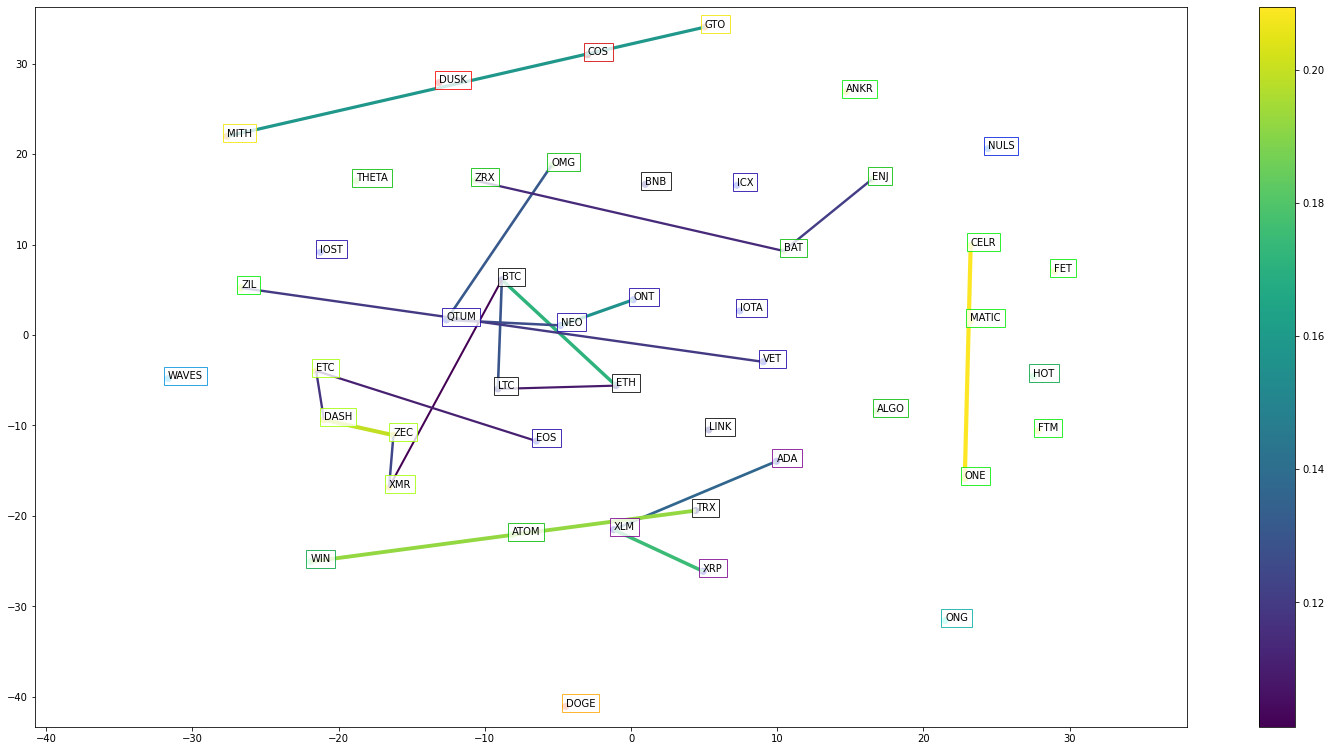

In [37]:
mkrt.view()

In [38]:
mkrt.plot()

In [39]:
"""

dd = mkrt.df

fig = px.scatter_3d(x=dd.x, y=dd.y, z=dd.z, color=dd.labels, hover_name=dd.index)

#Fig = go.FigureWidget(fig)
fig.update_layout(height = 700 , width =1000,
                  margin=dict(
                        l=5, r=0, b=10, t=30,
                        pad=1
                    ),showlegend=True,
                  )
"""

'\n\ndd = mkrt.df\n\nfig = px.scatter_3d(x=dd.x, y=dd.y, z=dd.z, color=dd.labels, hover_name=dd.index)\n\n#Fig = go.FigureWidget(fig)\nfig.update_layout(height = 700 , width =1000,\n                  margin=dict(\n                        l=5, r=0, b=10, t=30,\n                        pad=1\n                    ),showlegend=True,\n                  )\n'

In [40]:
clusters = mkrt.cluster
clusters

{'cluster 0': array(['ETH', 'BTC', 'BNB', 'LTC', 'TRX', 'LINK'], dtype='<U5'),
 'cluster 1': array(['ADA', 'XRP', 'XLM'], dtype='<U5'),
 'cluster 2': array(['NEO', 'QTUM', 'EOS', 'IOTA', 'ONT', 'ICX', 'VET', 'IOST'],
       dtype='<U5'),
 'cluster 3': array(['NULS'], dtype='<U5'),
 'cluster 4': array(['WAVES'], dtype='<U5'),
 'cluster 5': array(['ONG'], dtype='<U5'),
 'cluster 6': array(['HOT', 'WIN'], dtype='<U5'),
 'cluster 7': array(['ZRX', 'BAT', 'OMG', 'THETA', 'ENJ', 'ATOM', 'ALGO'], dtype='<U5'),
 'cluster 8': array(['ZIL', 'FET', 'CELR', 'MATIC', 'ONE', 'FTM', 'ANKR'], dtype='<U5'),
 'cluster 9': array(['ETC', 'XMR', 'ZEC', 'DASH'], dtype='<U5'),
 'cluster 10': array(['MITH', 'GTO'], dtype='<U5'),
 'cluster 11': array(['DOGE'], dtype='<U5'),
 'cluster 12': array(['DUSK'], dtype='<U5'),
 'cluster 13': array(['COS'], dtype='<U5')}

In [41]:
asset = ["CELR", "ONE", "BTC", "WIN", "FTM"]
START = "2019-06-02"

dd = data_r = get_data(interval="1d", assets = asset, start=START, end=END)
px.line((dd + 1).cumprod())

In [42]:
clusters = mkrt.cluster
clusters

{'cluster 0': array(['ETH', 'BTC', 'BNB', 'LTC', 'TRX', 'LINK'], dtype='<U5'),
 'cluster 1': array(['ADA', 'XRP', 'XLM'], dtype='<U5'),
 'cluster 2': array(['NEO', 'QTUM', 'EOS', 'IOTA', 'ONT', 'ICX', 'VET', 'IOST'],
       dtype='<U5'),
 'cluster 3': array(['NULS'], dtype='<U5'),
 'cluster 4': array(['WAVES'], dtype='<U5'),
 'cluster 5': array(['ONG'], dtype='<U5'),
 'cluster 6': array(['HOT', 'WIN'], dtype='<U5'),
 'cluster 7': array(['ZRX', 'BAT', 'OMG', 'THETA', 'ENJ', 'ATOM', 'ALGO'], dtype='<U5'),
 'cluster 8': array(['ZIL', 'FET', 'CELR', 'MATIC', 'ONE', 'FTM', 'ANKR'], dtype='<U5'),
 'cluster 9': array(['ETC', 'XMR', 'ZEC', 'DASH'], dtype='<U5'),
 'cluster 10': array(['MITH', 'GTO'], dtype='<U5'),
 'cluster 11': array(['DOGE'], dtype='<U5'),
 'cluster 12': array(['DUSK'], dtype='<U5'),
 'cluster 13': array(['COS'], dtype='<U5')}

In [43]:
coins = ["GALA", "CELR", "CELO", "COMP", "DODO", "TWT", "THETA", "BTC", "SOL"]
asset = ["CELR", "ONE", "WIN", "FTM"]

ASSETS = asset
df = get_data(interval="1d", start="2017", end="2023", assets = ASSETS).dropna()

threshold = 0.15
mkrt = Market(df)
mkrt.execute(threshold)

c:\Users\cc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



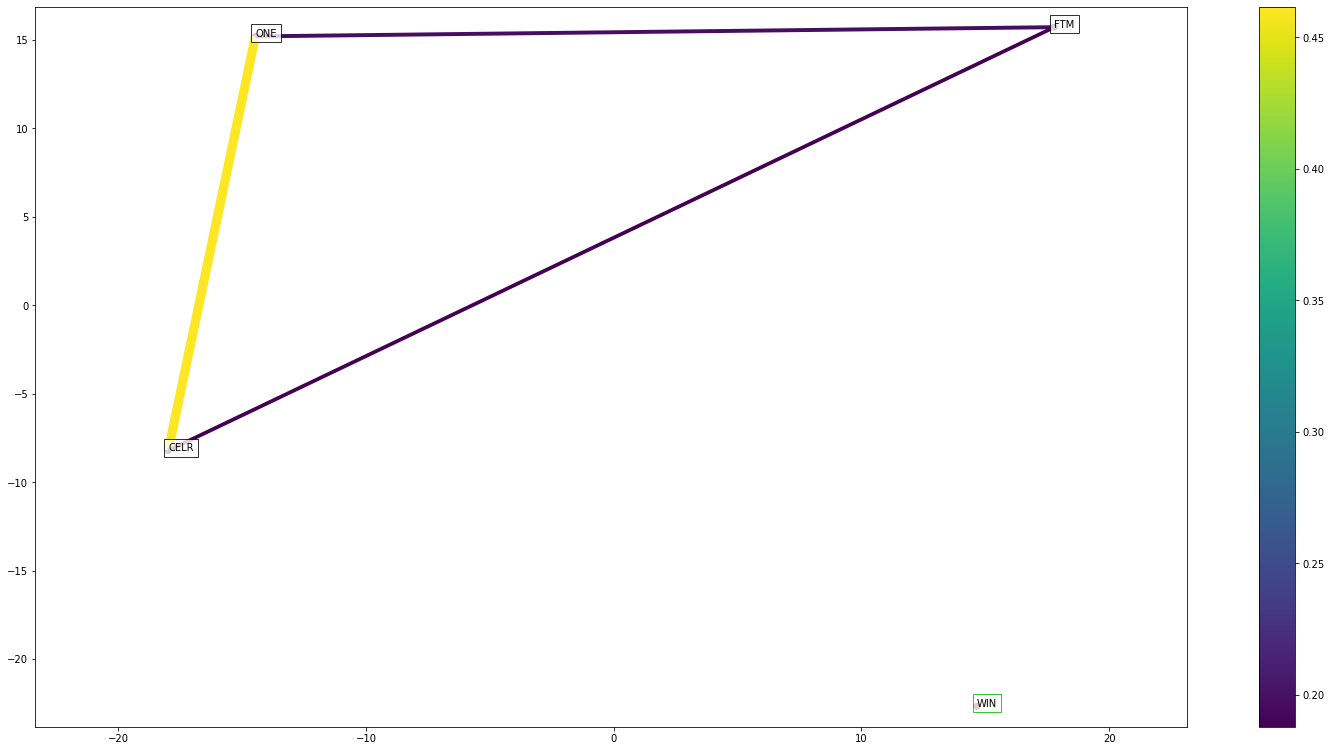

In [44]:
mkrt.view()

In [45]:
asset = clusters['cluster 0']
dd = get_data(asset).dropna()
dd

ETH       BTC       BNB       LTC       TRX      LINK
time                                                                  
2019-01-17  0.000494  0.006785  0.038663  0.003516  0.005244 -0.028396
2019-01-18 -0.019500 -0.005901  0.025306 -0.020064 -0.020465  0.029016
2019-01-19  0.028782  0.019592  0.005118  0.039974 -0.009013 -0.012873
2019-01-20 -0.041843 -0.034382 -0.018267 -0.042500 -0.026457  0.000621
2019-01-21 -0.015664 -0.003498  0.011186  0.005875  0.077282  0.028548
...              ...       ...       ...       ...       ...       ...
2023-06-28 -0.032579 -0.020038 -0.029053 -0.057341 -0.007670 -0.061794
2023-06-29  0.013113  0.012298  0.010841  0.020597  0.009492  0.013070
2023-06-30  0.044169  0.000811  0.030888  0.282899  0.023506  0.071635
2023-07-01 -0.004804  0.003738  0.031627 -0.014719  0.013911  0.030097
2023-07-02 -0.005601 -0.002888 -0.016942  0.013259 -0.024333 -0.017684

[1628 rows x 6 columns]

In [46]:
px.line((dd+1).cumprod())

In [47]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.preprocessing import StandardScaler


h = 24
returns = pd.DataFrame((data_r + 1).prod() **(data_r.shape[0]/(365*h))) - 1
returns.columns = ["Returns"]
returns['Volatility'] = data_r.std() * np.sqrt(365*h)

data = returns 

In [48]:
scaler = StandardScaler().fit(data)

r_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'dcoord': [[0.0, 0.337145089774395, 0.337145089774395, 0.0],
  [0.0, 1.0130688499060039, 1.0130688499060039, 0.337145089774395],
  [0.0, 2.9363994544936047, 2.9363994544936047, 1.0130688499060039],
  [0.0, 3.1996223116863023, 3.1996223116863023, 2.9363994544936047]],
 'ivl': ['BTC', 'FTM', 'WIN', 'CELR', 'ONE'],
 'leaves': [2, 4, 3, 0, 1],
 'color_list': ['C1', 'C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1', 'C1']}

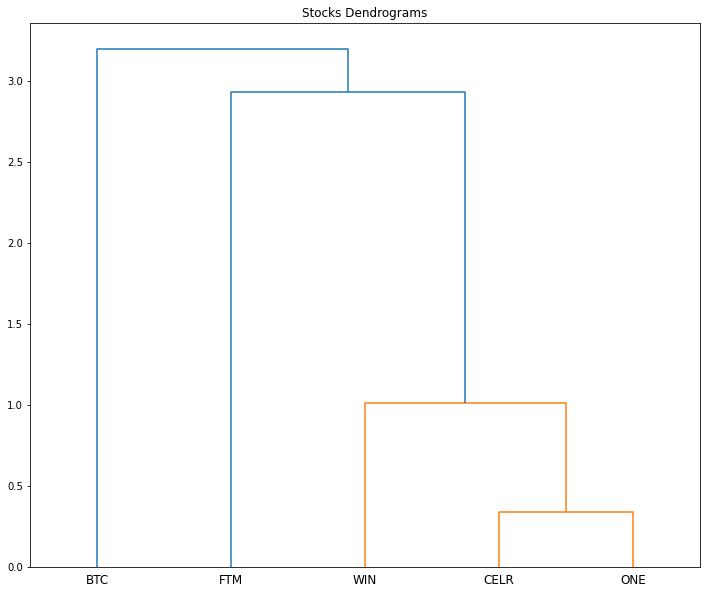

In [49]:
Z = linkage(r_data, method="ward")

plt.figure(figsize=(12, 10))
plt.title("Stocks Dendrograms")
dendrogram(Z, labels=r_data.index)